In [1]:
# imprescindible
import pandas as pd
import numpy as np

# to avoid some warnings messages
import warnings
warnings.filterwarnings('ignore')

# to draw some graphs
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn and matplotlib default theme
sns.set_theme()
_sns_plotting_contex_ = sns.plotting_context()
sns.plotting_context('poster')

# set seaborn and matplotlib style to ...
# plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 18
sns.mpl.rcParams['axes.labelsize'] = 14

# to use HTML codes within IPpython.display function
from IPython.display import HTML



In [2]:
def set_figure(row, col, suptitle=None) :
    u''' Activate matplot figure setting size and super title
    '''
    fig = plt.figure(figsize=(row, col));
    if suptitle != None :
        fig.suptitle(suptitle, 
                     verticalalignment='center', fontsize='xx-large', fontweight='extra bold');
    return fig

In [3]:

from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Data

In [4]:
data_raw = pd.read_csv("./data/blogData_train.csv", header=None)
data_raw.drop_duplicates(inplace=True)

In [5]:
data_raw.shape

(49203, 281)

In [6]:
to_classes = lambda v : 0 if v <= 50 else (1 if v <= 100 else (2 if v <= 150 else (3 if v <= 200 else 4)))

In [7]:
X_train = data_raw.iloc[:,50:280]
y_train = data_raw.iloc[:,-1]

y_train = y_train.apply(to_classes)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [9]:
# RMSE = lambda v: round(np.sqrt(v), 4)

class Model :
    def __init__(self, name, model) :
        self.name = name
        self.model = model
        return    


In [10]:

models = []
models.append( Model('Naive Bayes Gaussian', 
                     GaussianNB() 
                    ) 
             )

models.append( Model('Random Forest Classifier', 
                     RandomForestClassifier(
                         n_estimators=100, 
                         criterion='gini', 
                         max_depth=3, 
                         bootstrap=True, 
                         n_jobs=-1, 
                         max_samples=0.3, 
                         random_state=127
                     ) 
                    ) 
             )

models.append( Model('Gradient Boosting Classifier', 
                     GradientBoostingClassifier(
                         # loss='log_loss', # loss function to optimize ???
                         learning_rate=0.1, # contribution of each tree
                         n_estimators=100, # large values -> better performance
                         subsample=1, #  values < 1.0 -> low variance and high bias
                         criterion='friedman_mse', # measure the quality of a split
                         max_depth=3, # tree depth limits the number of nodes
                         random_state=127
                     ) 
                    ) 
             )


for m in models :
    m.model.fit(X_train, y_train)
    y_pred = m.model.predict(X_train)
    display(HTML('<b>' + m.name + '</b>'))
    print(classification_report(y_train, y_pred, digits=6, target_names=None, output_dict=False))


              precision    recall  f1-score   support

           0   1.000000  0.013303  0.026257     47884
           1   0.024259  0.065099  0.035346       553
           2   0.014959  0.080972  0.025253       247
           3   0.003167  0.985714  0.006313       140
           4   0.018911  0.108179  0.032195       379

    accuracy                       0.017722     49203
   macro avg   0.212259  0.250654  0.025073     49203
weighted avg   0.973695  0.017722  0.026343     49203



              precision    recall  f1-score   support

           0   0.973193  1.000000  0.986414     47884
           1   0.000000  0.000000  0.000000       553
           2   0.000000  0.000000  0.000000       247
           3   0.000000  0.000000  0.000000       140
           4   0.000000  0.000000  0.000000       379

    accuracy                       0.973193     49203
   macro avg   0.194639  0.200000  0.197283     49203
weighted avg   0.947104  0.973193  0.959971     49203



              precision    recall  f1-score   support

           0   0.983230  0.999102  0.991102     47884
           1   0.776699  0.144665  0.243902       553
           2   0.895522  0.242915  0.382166       247
           3   0.966667  0.414286  0.580000       140
           4   0.727848  0.606860  0.661871       379

    accuracy                       0.981017     49203
   macro avg   0.869993  0.481566  0.571808     49203
weighted avg   0.978454  0.981017  0.975942     49203



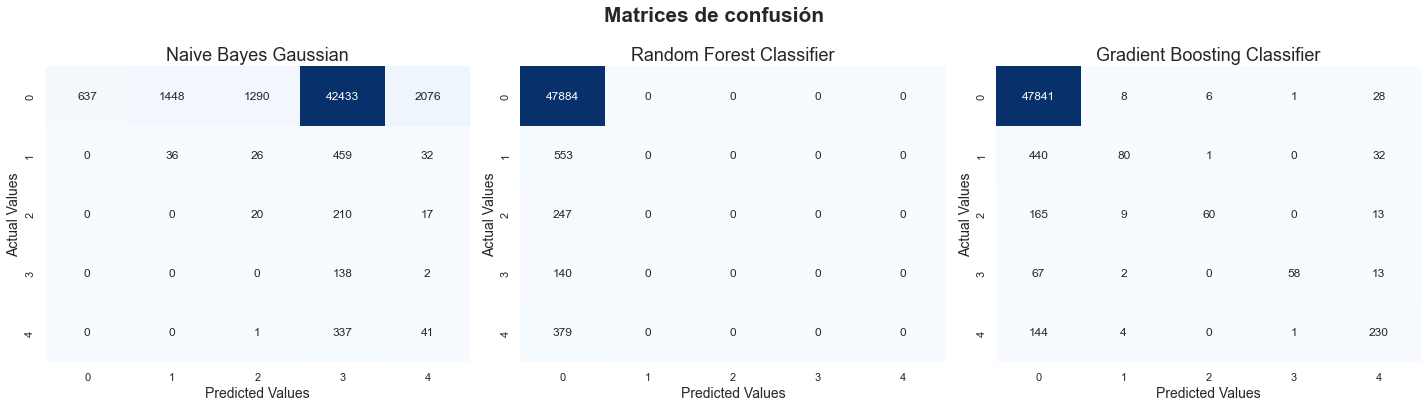

In [11]:
fig = set_figure(20, 10, 'Matrices de confusión')
cols = 3
rows = (len(models) // cols) + 1

for i, m in enumerate(models) :
    y_pred = m.model.predict(X_train)
    
    plt.subplot(rows, cols, i+1)
    ax=sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.tight_layout();
    plt.title(m.name);
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
   


---

In [12]:
import os

In [13]:

filepath = './data/test/'
filelist = [os.path.join(filepath, filename) for filename in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, filename))]


In [14]:

test_raw = pd.DataFrame()

for filename in filelist :
    temp_raw = pd.read_csv(filename, header=None)
    temp_raw.drop_duplicates(inplace=True)
    test_raw = test_raw.append(temp_raw)

test_raw.shape

(7036, 281)

In [15]:
X_test = test_raw.iloc[:,50:280]
y_test = test_raw.iloc[:,-1]

y_test = y_test.apply(to_classes)

# using train scaler
X_test = scaler.transform(X_test)

for m in models :
    y_pred = m.model.predict(X_test)
    display(HTML('<b>' + m.name + '</b>'))
    print(classification_report(y_test, y_pred, digits=6, target_names=None, output_dict=False))


              precision    recall  f1-score   support

           0   0.958333  0.010036  0.019865      6875
           1   0.025000  0.075758  0.037594        66
           2   0.000000  0.000000  0.000000        36
           3   0.002041  0.928571  0.004073        14
           4   0.003846  0.022222  0.006557        45

    accuracy                       0.012507      7036
   macro avg   0.197844  0.207318  0.013618      7036
weighted avg   0.936668  0.012507  0.019813      7036



              precision    recall  f1-score   support

           0   0.977118  1.000000  0.988426      6875
           1   0.000000  0.000000  0.000000        66
           2   0.000000  0.000000  0.000000        36
           3   0.000000  0.000000  0.000000        14
           4   0.000000  0.000000  0.000000        45

    accuracy                       0.977118      7036
   macro avg   0.195424  0.200000  0.197685      7036
weighted avg   0.954759  0.977118  0.965809      7036



              precision    recall  f1-score   support

           0   0.981961  0.997673  0.989755      6875
           1   0.125000  0.015152  0.027027        66
           2   0.125000  0.027778  0.045455        36
           3   0.000000  0.000000  0.000000        14
           4   0.531250  0.377778  0.441558        45

    accuracy                       0.977544      7036
   macro avg   0.352642  0.283676  0.300759      7036
weighted avg   0.964702  0.977544  0.970417      7036



---


In [16]:

# esto aplica el/los modelos en cada archivo de test

# for filename in filelist :
#     temp_raw = pd.read_csv(filename, header=None)
#     temp_raw.drop_duplicates(inplace=True)

#     X_test = temp_raw.iloc[:,0:280]
#     y_test = temp_raw.iloc[:,-1]

#     y_test = y_test.apply(to_classes)

#     # using train scaler
#     X_test = scaler.transform(X_test)

#     print('==================')
#     for m in models :
#         y_pred = m.model.predict(X_test)
#         display(HTML('<b>' + m.name + '</b>'))
#         print(classification_report(y_test, y_pred, digits=6, target_names=None, output_dict=False))
